In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import plotly.express as px
import nltk
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import plotly.express as px
import nltk
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import re    
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk_lemmatizer = nltk.stem.WordNetLemmatizer()
from tqdm import tqdm
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.layers import Flatten
from numpy import array
from numpy import asarray
from numpy import zeros
import emoji

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
df.sample(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
3306,3306,872,52,NaN,NaN,5,1,0,General Petite,Tops,Knits
15883,15883,601,46,Boys and arrows bottom,Love! boys and arrows make amazing suits! i we...,5,1,0,Initmates,Intimate,Swim
13408,13408,927,27,Updated classic,The fair-isle details are gorgeous and the woo...,5,1,0,General Petite,Tops,Sweaters
12710,12710,1110,45,"Good idea, but...",This dress has great potential. i happen to ha...,3,1,3,General,Dresses,Dresses
18411,18411,876,29,Unique and perfect,Such great detail great beautiful in red and w...,5,1,0,General,Tops,Knits


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
print("**"*17)
print(df.isnull().sum())
print("**"*17)

**********************************
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64
**********************************


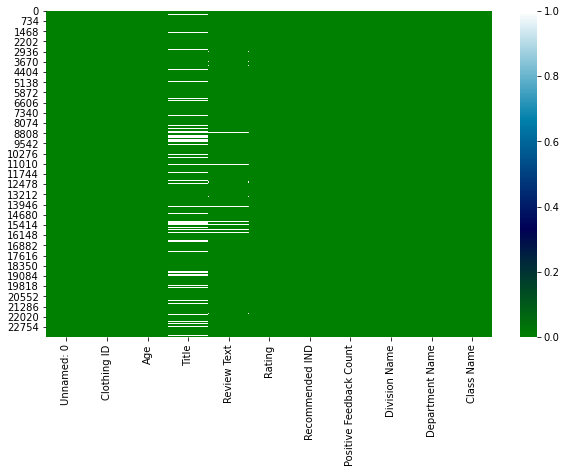

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='ocean')
plt.show()

In [7]:
df.dropna(subset=["Review Text","Division Name","Department Name","Class Name","Review Text","Title"], inplace = True)

In [8]:
pd.options.display.float_format = '{:.3f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19662.000,11755.261,6772.063,2.000,5888.250,11749.500,17624.750,23485.000
Clothing ID,19662.000,921.297,200.228,1.000,861.000,936.000,1078.000,1205.000
Age,19662.000,43.261,12.258,18.000,34.000,41.000,52.000,99.000
Rating,19662.000,4.183,1.112,1.000,4.000,5.000,5.000,5.000
Recommended IND,19662.000,0.818,0.386,0.000,1.000,1.000,1.000,1.000
Positive Feedback Count,19662.000,2.652,5.834,0.000,0.000,1.000,3.000,122.000


In [9]:
df[['Title', 'Division Name', 'Department Name', 'Class Name']].describe(include=['O']).T.drop('count', axis=1)

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,11664
Department Name,6,Tops,8713
Class Name,20,Dresses,5371


In [10]:
print("Rating unique:",df["Rating"].unique())
print("Division Name unique:",df["Division Name"].unique())
print("Department Name unique:",df["Department Name"].unique())
print("Class Name unique:",df["Class Name"].unique())

Rating unique: [3 5 2 4 1]
Division Name unique: ['General' 'General Petite' 'Initmates']
Department Name unique: ['Dresses' 'Bottoms' 'Tops' 'Intimate' 'Jackets' 'Trend']
Class Name unique: ['Dresses' 'Pants' 'Blouses' 'Knits' 'Intimates' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Shorts' 'Legwear' 'Layering' 'Casual bottoms' 'Chemises']


In [11]:
print((df['Division Name'].value_counts()/(df['Division Name'].value_counts().sum()))*100)
print((df['Department Name'].value_counts()/(df['Department Name'].value_counts().sum()))*100)
print((df['Class Name'].value_counts()/(df['Class Name'].value_counts().sum()))*100)

General          59.323
General Petite   34.473
Initmates         6.205
Name: Division Name, dtype: float64
Tops       44.314
Dresses    27.317
Bottoms    16.194
Intimate    7.161
Jackets     4.471
Trend       0.544
Name: Department Name, dtype: float64
Dresses          27.317
Knits            20.247
Blouses          13.157
Sweaters          6.195
Pants             5.884
Jeans             4.933
Fine gauge        4.715
Skirts            4.048
Jackets           3.041
Lounge            2.919
Swim              1.490
Outerwear         1.429
Shorts            1.322
Sleep             0.885
Legwear           0.666
Intimates         0.610
Layering          0.585
Trend             0.544
Chemises          0.005
Casual bottoms    0.005
Name: Class Name, dtype: float64


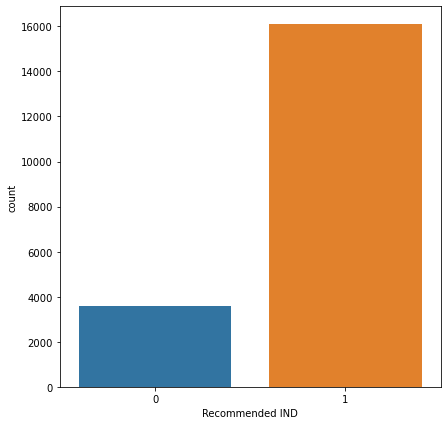

In [12]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x=df["Recommended IND"]);

In [13]:
one = df[df.Rating ==1].count().Rating*100/df.shape[0]
two = df[df.Rating ==2].count().Rating*100/df.shape[0]
three = df[df.Rating ==3].count().Rating*100/df.shape[0]
four = df[df.Rating ==4].count().Rating*100/df.shape[0]
five = df[df.Rating ==5].count().Rating*100/df.shape[0]

In [14]:
color = [one,two,three,four,five]

In [15]:
k = [1,2,3,4,5]

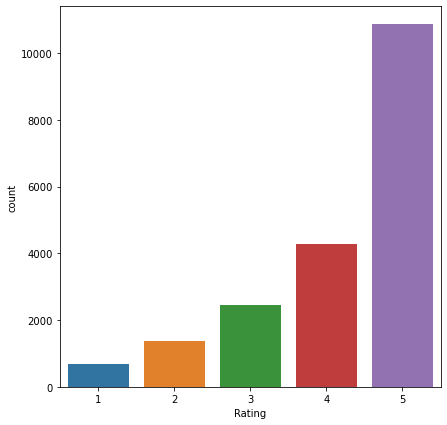

In [16]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x=df["Rating"])


fig = go.Figure(data=[
    go.Pie(
        labels=k,
        values=color
    )
])

fig.update_layout(
    title='Rating',
    height=450,
    width=450
)

iplot(fig)


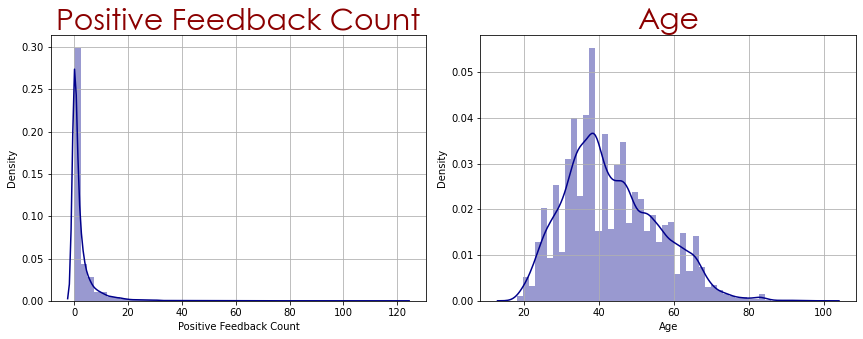

In [17]:
plt.figure(figsize=(30,30))
title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 30 }

plt.subplot(7,5,1)
sns.distplot(df["Positive Feedback Count"], color = "darkblue" )
plt.title("Positive Feedback Count",fontdict = title_style)
plt.grid(True)

plt.subplot(7,5,2)
sns.distplot(df["Age"], color = "darkblue" )
plt.title("Age",fontdict = title_style)
plt.grid(True)
    
plt.tight_layout()   
plt.show()

Yaş dağılımı 80'den sonrası için mantıklı değil

In [18]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [19]:
columns = df[["Age","Rating","Recommended IND","Positive Feedback Count"]]

<Figure size 1440x1080 with 0 Axes>

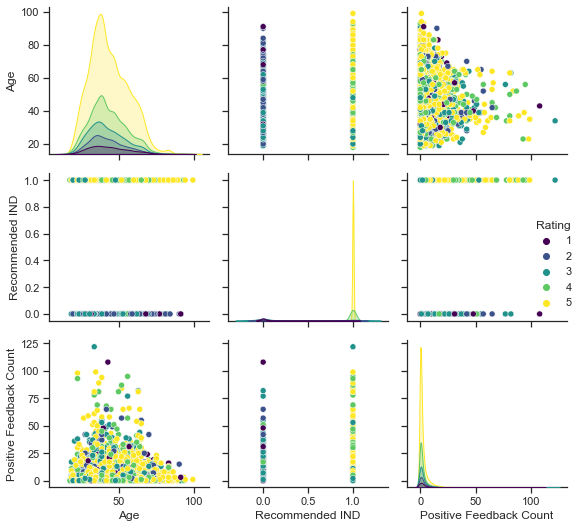

In [20]:
plt.figure(figsize=(20,15))
sns.set_theme(style="ticks")
sns.pairplot(columns, hue="Rating",palette ="viridis")

plt.tight_layout()   
plt.show()

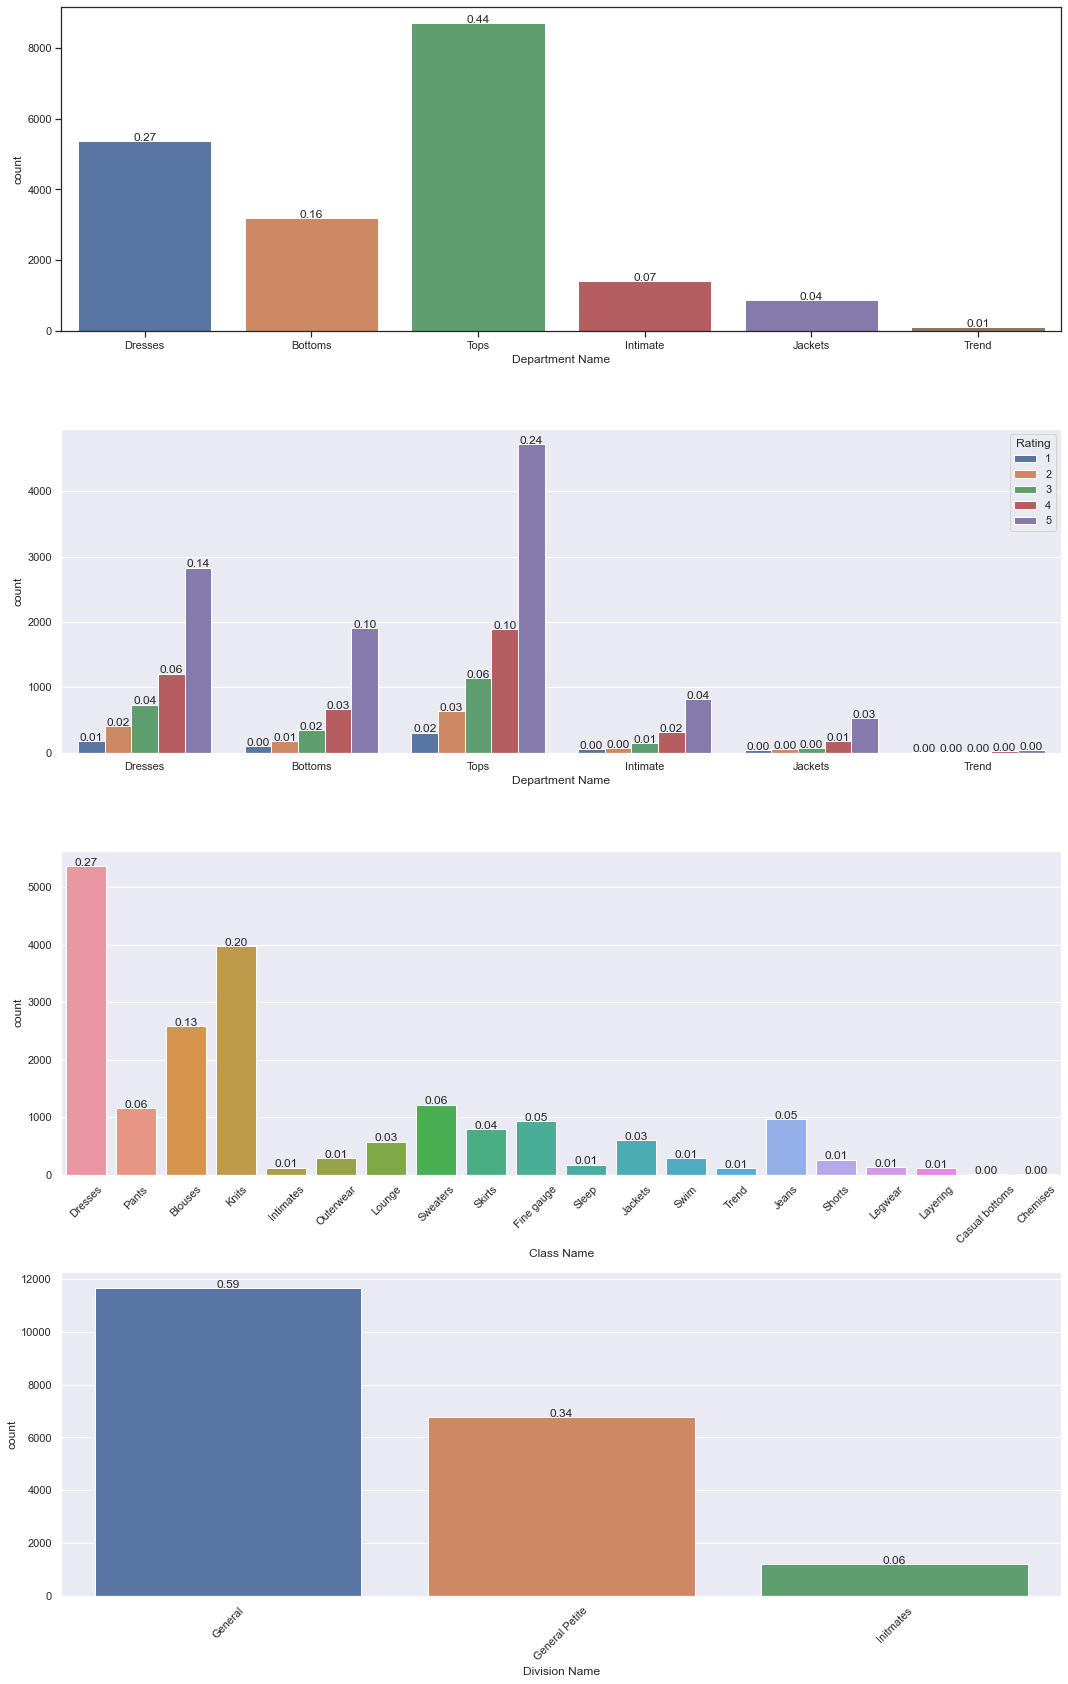

In [21]:
from matplotlib.pyplot import show
plt.figure(figsize=(15,40))
plt.subplot(7,1,1)
sns.set(style="darkgrid")
total = float(len(df)) 
ax = sns.countplot(x='Department Name', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

plt.subplot(7,1,2)
sns.set(style="darkgrid")
total = float(len(df)) 
ax = sns.countplot(x='Department Name',hue = "Rating" ,data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

plt.subplot(7,1,3)
sns.set(style="darkgrid")
total = float(len(df)) 
ax = sns.countplot(x='Class Name',data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    plt.xticks(rotation=45)

plt.subplot(7,1,4)
sns.set(style="darkgrid")
total = float(len(df)) 
ax = sns.countplot(x='Division Name',data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    plt.xticks(rotation=45)
plt.tight_layout()
show()


In [22]:
def dept(data,i,title):
    plt.figure(figsize=(15,40))
    plt.subplot(7,1,i)
    sns.set(style="darkgrid")
    plt.title(title)
    total = float(len(df)) 
    ax = sns.countplot(x='Division Name', data=data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 

In [23]:
rating_5 = df[df["Rating"]==5]
rating_4 = df[df["Rating"]==4]
rating_3 = df[df["Rating"]==3]
rating_2 = df[df["Rating"]==2]
rating_1 = df[df["Rating"]==1]

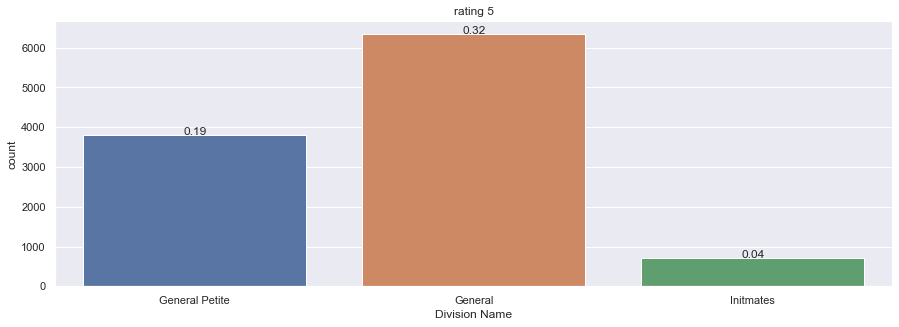

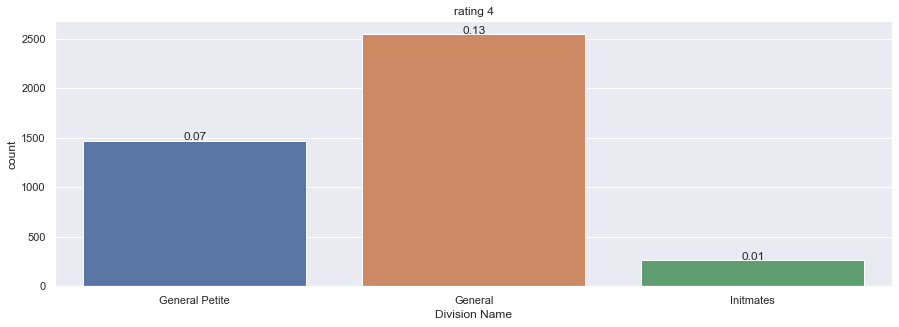

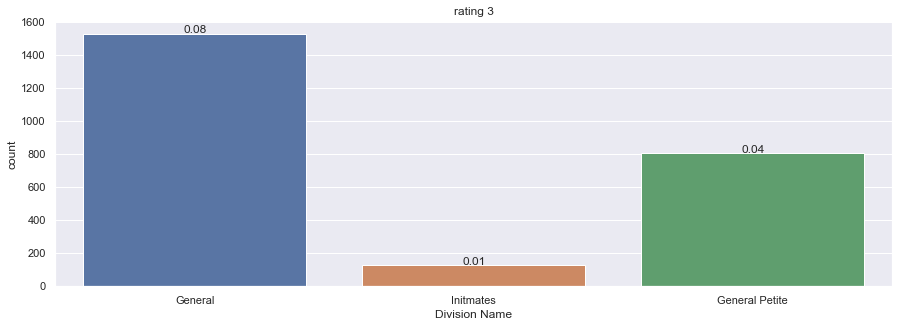

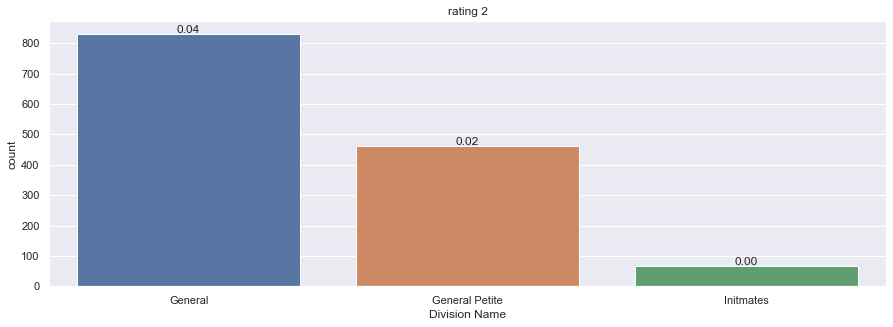

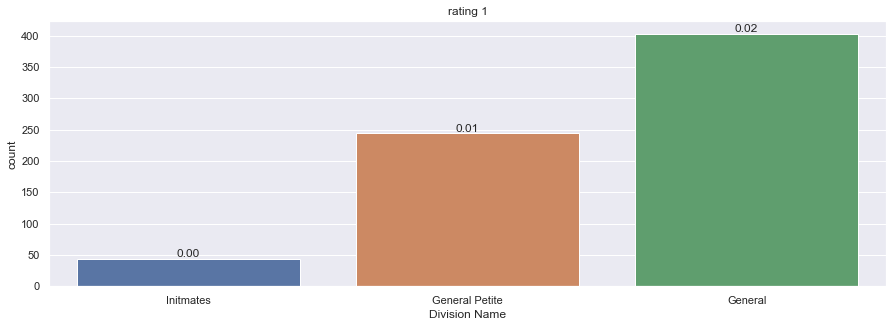

In [24]:
dept(rating_5,1,"rating 5")
dept(rating_4,2,"rating 4")
dept(rating_3,3,"rating 3")
dept(rating_2,4,"rating 2")
dept(rating_1,5,"rating 1")

In [25]:
age_30 = df[df["Age"]<=30]
b = df[df["Age"]>=30]
age_40 = b[b["Age"]<40]
z = df[df["Age"]>=40]
age_50 = z[z["Age"]<50]
l = df[df["Age"]>=50]
age_60 = l[l["Age"]<60]
m = df[df["Age"]>=60]
age_70 = m[m["Age"]<70]
a = df[df["Age"]>=70]
age_100 = a[a["Age"]<100]

In [26]:
def age_(age,title,i):
    plt.figure(figsize=(15,20))
    plt.subplot(6,1,i)
    ax =sns.barplot(age.groupby(by='Department Name')['Age'].count().index,
               age.groupby(by='Department Name')['Age'].count(),palette="ocean")
    plt.title(title)
    plt.xlabel("Departments")
    plt.ylabel("Number of Review")
    plt.xticks(rotation=45)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center")

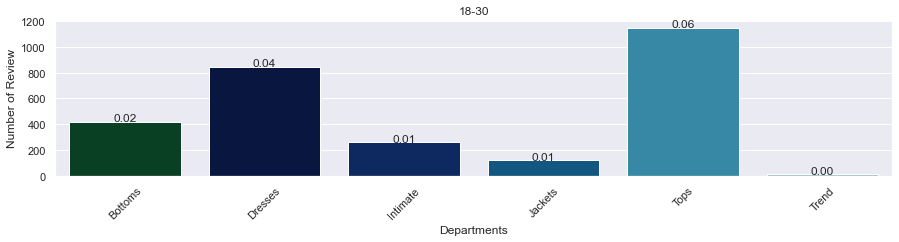

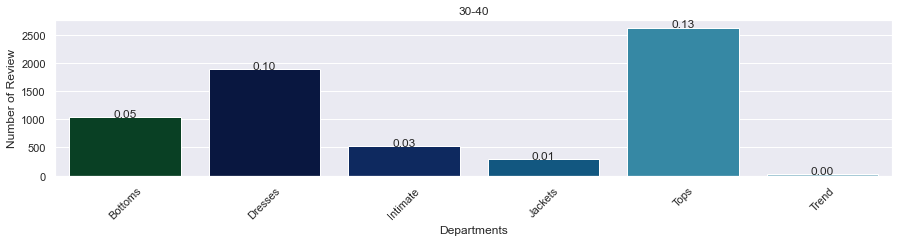

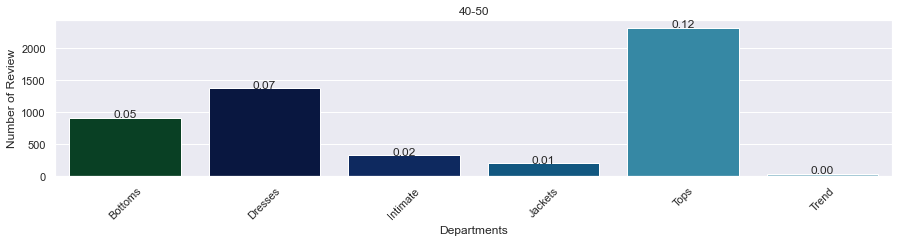

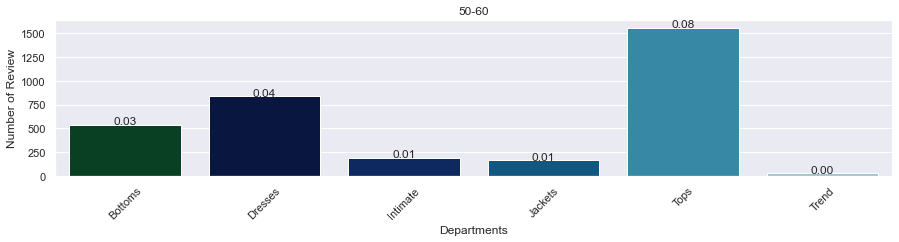

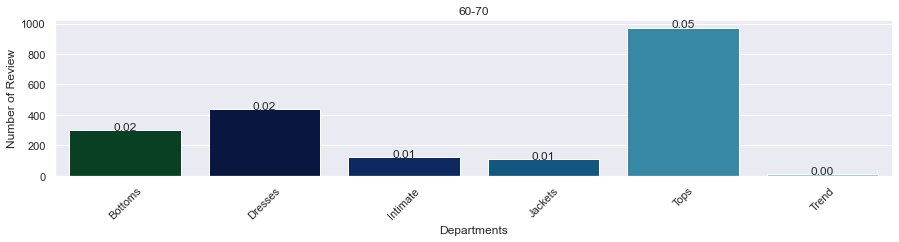

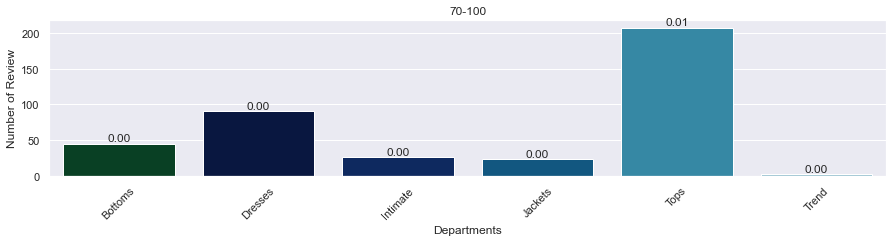

In [27]:
age_(age_30,"18-30",1)
age_(age_40,"30-40",2)
age_(age_50,"40-50",3)
age_(age_60,"50-60",4)
age_(age_70,"60-70",5)
age_(age_100,"70-100",6)

Ürünü en çok inceleyen yaş grubu 30 - 40 ve 40-50 arasında. Buraya bakılarak hangi kesime daha çok hitap ettiği çıkarılabilir.

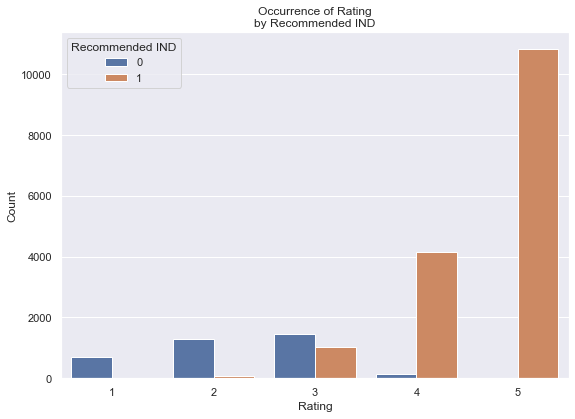

In [28]:
hue = "Rating"
fig = plt.figure(figsize=(20, 14))

ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(x="Rating", hue="Recommended IND",data=df)
ax1 = plt.title("Occurrence of {}\nby {}".format(hue, "Recommended IND"))
ax1 = plt.ylabel("Count")


In [29]:
df['GoodBad'] = 0
df.loc[df.Rating >= 4, ['GoodBad']] = 1

In [30]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,GoodBad
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,1
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0


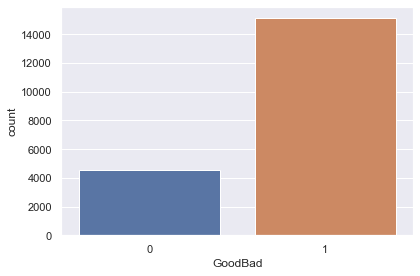

In [31]:
sns.set(style="darkgrid")
sns.countplot(x='GoodBad',data=df)
plt.tight_layout()
show()

In [32]:
ClR = df.groupby('Class Name').agg({'Rating': np.average})
cv = df['Class Name'].value_counts()

trace = go.Scatter3d( x = ClR.index,
                      y = ClR['Rating'],
                      z = cv[ClR.index],
                      mode = 'markers',
                      marker = dict(size=10,color=df['Rating']),
                      hoverinfo ="text",
                      text="Class: "+ClR.index+" \ Average Rating: "+ClR['Rating'].map(' {:,.2f}'.format).apply(str)
                     +" \ Number of Reviewers: "+cv[ClR.index].apply(str)
                      )

data = [trace]
layout = go.Layout(title="Average Rating & Class & Number of Reviewers",
                   scene = dict(
                    xaxis = dict(title='Class'),
                    yaxis = dict(title='Average Rating'),
                    zaxis = dict(title='Number of Sales'),),
                   margin = dict(l=30, r=30, b=30, t=30))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
plt.savefig('3D_Scatter.png')

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

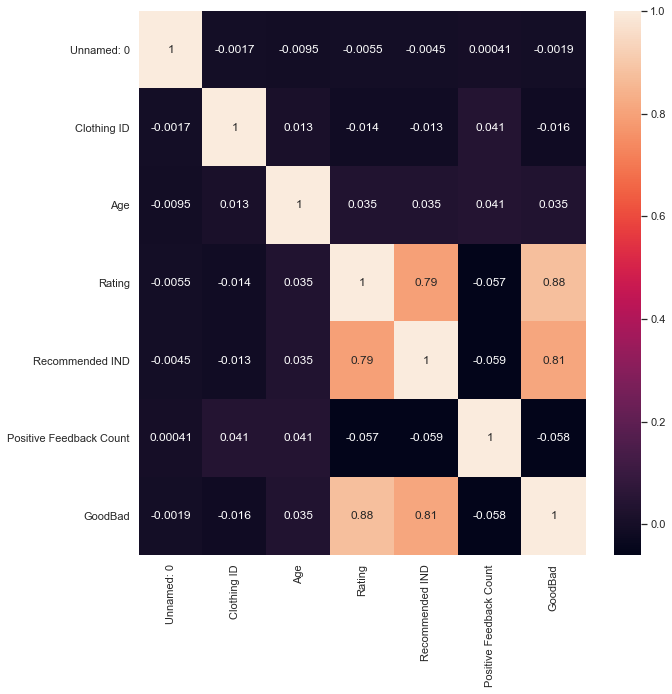

In [33]:
pd.options.display.float_format = '{:.3f}'.format
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True)

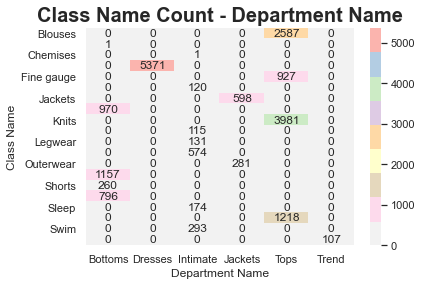

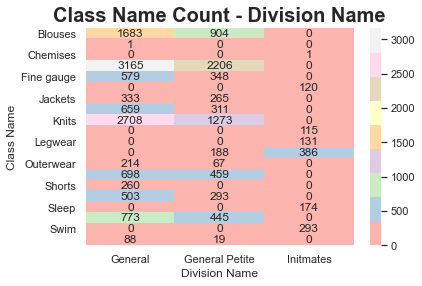

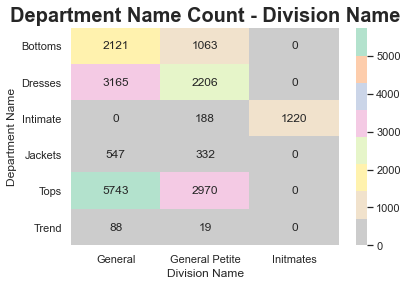

In [34]:
sns.heatmap(pd.crosstab(df['Class Name'],df["Department Name"]),
            annot=True,fmt='g', cmap="Pastel1_r")
plt.title("Class Name Count - Department Name",fontsize=20,fontweight='bold')
plt.show()

sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"]),
            annot=True,fmt='g', cmap="Pastel1")
plt.title("Class Name Count - Division Name",fontsize=20,fontweight='bold')

plt.show()

sns.heatmap(pd.crosstab(df['Department Name'], df["Division Name"]),
            annot=True,fmt='g', cmap="Pastel2_r")
plt.title("Department Name Count - Division Name",fontsize=20,fontweight='bold')

plt.show()

In [35]:
def load_data(filename,no_of_records):
    process_records = True
    data_load = pd.read_csv(filename)
    if filename == "processed.csv":
        process_records = False
        data_load = data_load.drop(columns=['Unnamed: 0'])
    data_load= data_load[0:no_of_records]
    return data_load,process_records

# Original dataset - IMDB Dataset.csv
# Pre-processed dataset - processed.csv



data_orig,process_records = load_data('Womens Clothing E-Commerce Reviews.csv',50000)
print("Dataset shape:",data_orig.shape)

Dataset shape: (23486, 11)


In [36]:
def class_div(data):
    data_orig['Recommended IND'] = data
    if process_records == False:
        pos = 1
        neg = 0

    else:
        pos = 'positive'
        neg = 'negative'
    
    return

class_div(data_orig['Recommended IND'])

# Working with Text

noktalama işaretlerinin arındırılması (cleaning)

cümle, kelime, harf veya n-gramlar halinde parçalama (tokenization)

özel karakterler ve nümerik değerler gibi farklı anlam birimlerinin nasıl ele alınacağı

büyük-küçük harf ayrımı olup olmayacağı

kelimeler olduğu gibi mi kullanılacağı yoksa köklerine mi dönüştürüleceği

hatalı yazılmış kelimeler in olduğu gibi mi yoksa düzeltilerek mi ele alınacağı

## Text Pre-Processing

In [37]:
from PIL import Image
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib as mpl
import nltk
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
import tokenizer
import re
from nltk.corpus import stopwords
from spellchecker import SpellChecker
import emoji
from nltk.stem import WordNetLemmatizer

In [38]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,GoodBad
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,1
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0


## HTML

In [39]:
from bs4 import BeautifulSoup
def remove_html(text):
    bS = BeautifulSoup(text, "html.parser")
    stripped_text = bS.get_text()
    return stripped_text

In [40]:
df['Review Text1'] = df['Review Text'].apply(remove_html)

## Underscore

In [41]:
def remove_underscore(text):

    text = text.replace("_"," ")

    return text

In [42]:
df['Review Text1'] = df['Review Text1'].apply(remove_underscore)

## Lowercase

In [43]:
def lower_case(text):
    text = text.lower()
    return text

In [44]:
df['Review Text1'] = df['Review Text1'].apply(lower_case)

## Special Char

In [45]:
def remove_specials(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [46]:
def sip(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.replace("½"," ")
    text = text.replace("¾"," ")
    text = text.replace("º"," ") 
    text = text.replace("ª"," ")
    text = text.replace(""," ")
    return text

In [47]:
df['Review Text1'] = df['Review Text1'].apply(remove_specials)
df['Review Text1'] = df['Review Text1'].apply(sip)

## Spaces

In [48]:
def remove_spaces(text):
    text = " ".join(text.split())
    return text

In [49]:
df['Review Text1'] = df['Review Text1'].apply(remove_spaces)

## Numbers

In [50]:
def remove_numbers(text): 
    pattern = '[0-9]'
    text = re.sub(pattern, '',text)
    return text

In [51]:
df['Review Text1'] = df['Review Text1'].apply(remove_numbers)

## Stopwords

In [52]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
def get_text(text):
    text = text.lower()

    text = re.sub("I'm",'I m',text)
    text = re.sub(":", " ", text)
    text = re.sub("He's","he is", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    text = re.sub(r"[00-99]", "", text)
    text = re.sub(r"none", "", text)

    return text

In [54]:
df['Review Text1'] = df['Review Text1'].apply(get_text)

In [55]:
sw =("skirt","really","blouse","dress","sweater", "shirt","bottom", "pant", "pants" ,"jean", "jeans","jacket", "top", "dresse", "material", "while", "black","fabric", "color","order", "wear")

In [56]:
def remove_stopwords(text):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    stopword_list = nltk.corpus.stopwords.words('english')
    filtered_sentence = []
    for token in tokens: 
        if token not in stopword_list: 
            filtered_sentence.append(token)
            
    return " ".join(filtered_sentence)

In [57]:
df['Review Text1'] = df['Review Text1'].apply(remove_stopwords)

In [58]:
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,GoodBad,Review Text1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0,high hopes dress really wanted work initially ...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1,love love love jumpsuit fun flirty fabulous ev...
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1,shirt flattering due adjustable front tie perf...


## Lemmatize

In [59]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([nltk_lemmatizer.lemmatize(token,get_wordnet_pos(token)) for token in tokens])
    return lemmatized_output

In [60]:
df['Review Text1'] = df['Review Text1'].apply(lemmatize_text)

In [61]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,GoodBad,Review Text1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0,high hope dress really want work initially ord...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1,love love love jumpsuit fun flirty fabulous ev...
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1,shirt flatter due adjustable front tie perfect...
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0,love tracy reese dress one petite foot tall us...
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1,aded basket hte last mintue see would look lik...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,1,happy snag dress great price easy slip flatter...
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0,reminds maternity clothes soft stretchy shiny ...
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0,fit well top see never would work im glad able...
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0,bought dress wedding summer cute unfortunately...


## Emoji

In [62]:
df['Review Text1'] = df['Review Text1'].apply(lambda line: emoji.demojize(line))

# Word Cloud

In [63]:
df['Recommended IND']=df['Recommended IND'].astype('int')

In [64]:
df['tokenized_Rew'] = df.apply(lambda row: nltk.word_tokenize(row['Review Text1']), axis=1)

In [65]:
from nltk.probability import FreqDist

lists =  df['tokenized_Rew']
words = []
for wordList in lists:
    words += wordList

fdist = FreqDist(words)
mostcommon = fdist.most_common(50)
mclist = []
for i in range(len(mostcommon)):
    mclist.append(mostcommon[i][0])

words = [w for w in words if w in mclist]

    

In [66]:
def wordcloud(text,my_mask=None):
    wordcloud = WordCloud(width=800,height=800,max_words=50,collocations=False,
    min_font_size=10,contour_width=2, contour_color='cadetblue',mask=my_mask,background_color='white').generate(text)

    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [67]:
def image():
    plt.figure(figsize=(12,10))
    my_mask = np.array(Image.open("2840ec91047174d42b4ecd5e37aad685.jpg"))
    ret_text =(str(words).lower())
    wordcloud(ret_text,my_mask);

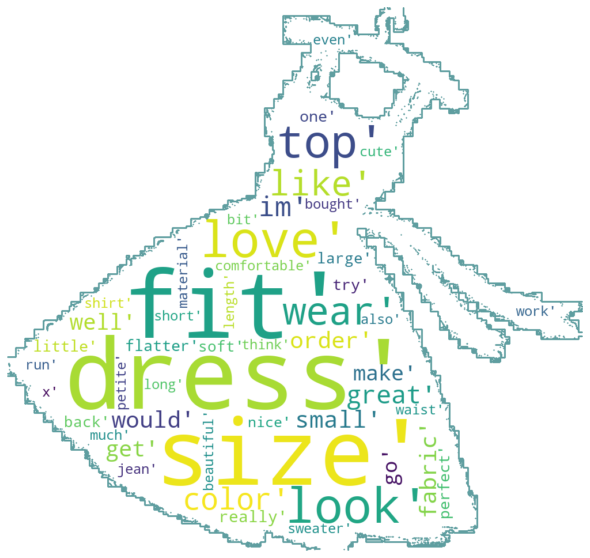

In [68]:
image()

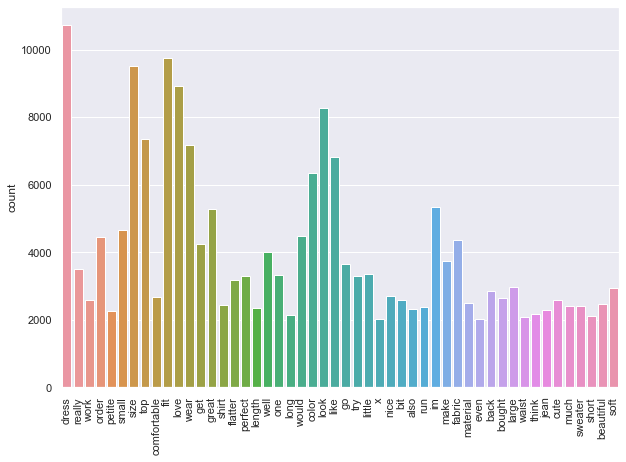

In [69]:
plt.figure(figsize=(10,7))
sns.countplot(words)
plt.xticks(rotation=90);

## Recommend

In [70]:
df.rename(columns={'Review Text1':'ReviewText1'}, inplace=True)
df.rename(columns={'Recommended IND':'RecommendedIND'}, inplace=True)

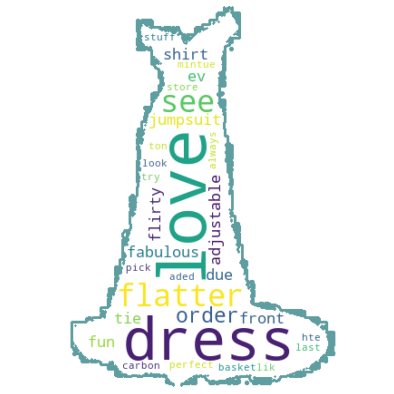

In [71]:
plt.figure(figsize=(10,7))

my_mask = np.array(Image.open("How-to-draw-a-wedding-dress-420x420.jpg"))
temp = str(df['ReviewText1'][df.RecommendedIND.astype(int) ==1])
wordcloud(temp,my_mask)

## Not Recommend

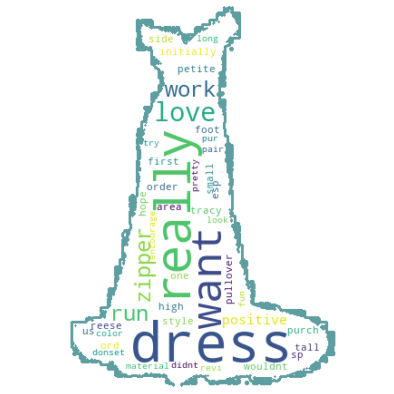

In [72]:
plt.figure(figsize=(10,7))

my_mask = np.array(Image.open("How-to-draw-a-wedding-dress-420x420.jpg"))
temp = str(df['ReviewText1'][df.RecommendedIND.astype(int) ==0])
wordcloud(temp,my_mask)

In [73]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,RecommendedIND,Positive Feedback Count,Division Name,Department Name,Class Name,GoodBad,ReviewText1,tokenized_Rew
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0,high hope dress really want work initially ord...,"[high, hope, dress, really, want, work, initia..."
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1,love love love jumpsuit fun flirty fabulous ev...,"[love, love, love, jumpsuit, fun, flirty, fabu..."


## Algorithms

In [74]:
vectorizer = CountVectorizer() 
tfvectorizer = TfidfVectorizer()

In [76]:
X_train,X_test,y_train,y_test = train_test_split(df['ReviewText1'],df['RecommendedIND'] ,random_state=42,test_size=0.2)

CountVectorizer'da, belgede yalnızca bir sözcüğün kaç kez göründüğünü sayıyoruz

TfidfVectorizer'da bir kelimenin genel belge ağırlığını dikkate alırız. En sık kullanılan kelimelerle başa çıkmamıza yardımcı olur. Bunu kullanarak onları cezalandırabiliriz. TfidfVectorizer, kelime sayılarını belgelerde ne sıklıkta göründüklerini ölçerek ağırlıklandırır.

## Logistic Regression

In [77]:
classifier = LogisticRegression()
LRmodelC = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Train the Model
LRmodelC.fit(X_train,y_train)   
LRpred = LRmodelC.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,LRpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,LRpred)}')
print(f'Accuracy: {accuracy_score(y_test,LRpred)*100}%')

Confusion Matrix:
[[ 434  266]
 [ 165 3068]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       700
           1       0.92      0.95      0.93      3233

    accuracy                           0.89      3933
   macro avg       0.82      0.78      0.80      3933
weighted avg       0.89      0.89      0.89      3933

Accuracy: 89.0414441901856%


In [78]:
LRC = accuracy_score(y_test,LRpred)

In [79]:
classifier = LogisticRegression()
LRmodelT = Pipeline([('vectorizer', tfvectorizer),
                 ('classifier', classifier)])

# Train the Model
LRmodelT.fit(X_train,y_train)   
LRpred = LRmodelT.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,LRpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,LRpred)}')
print(f'Accuracy: {accuracy_score(y_test,LRpred)*100}%')

Confusion Matrix:
[[ 386  314]
 [  96 3137]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       700
           1       0.91      0.97      0.94      3233

    accuracy                           0.90      3933
   macro avg       0.85      0.76      0.80      3933
weighted avg       0.89      0.90      0.89      3933

Accuracy: 89.57538774472414%


In [80]:
LRT = accuracy_score(y_test,LRpred)

## Random Forest

In [81]:
classifier = RandomForestClassifier()
RandomForestV = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Train the Model
RandomForestV.fit(X_train,y_train)   
rfpred = RandomForestV.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,rfpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,rfpred)}')
print(f'Accuracy: {accuracy_score(y_test,rfpred)*100}%')

Confusion Matrix:
[[ 132  568]
 [  14 3219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.19      0.31       700
           1       0.85      1.00      0.92      3233

    accuracy                           0.85      3933
   macro avg       0.88      0.59      0.61      3933
weighted avg       0.86      0.85      0.81      3933

Accuracy: 85.20213577421816%


In [82]:
RFC = accuracy_score(y_test,rfpred)

In [83]:
classifier = RandomForestClassifier()
RandomForestT = Pipeline([('vectorizer', tfvectorizer),
                 ('classifier', classifier)])

# Train the Model
RandomForestT.fit(X_train,y_train)   
rfpred = RandomForestT.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,rfpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,rfpred)}')
print(f'Accuracy: {accuracy_score(y_test,rfpred)*100}%')

Confusion Matrix:
[[ 114  586]
 [  16 3217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.16      0.27       700
           1       0.85      1.00      0.91      3233

    accuracy                           0.85      3933
   macro avg       0.86      0.58      0.59      3933
weighted avg       0.85      0.85      0.80      3933

Accuracy: 84.69361810322908%


In [84]:
RFT = accuracy_score(y_test,rfpred)

## SVC

In [85]:
from sklearn.svm import SVC
classifier = SVC()
SvcV = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Train the Model
SvcV.fit(X_train,y_train)   
svcpred = SvcV.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,svcpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,svcpred)}')
print(f'Accuracy: {accuracy_score(y_test,svcpred)*100}%')

Confusion Matrix:
[[ 373  327]
 [  91 3142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.53      0.64       700
           1       0.91      0.97      0.94      3233

    accuracy                           0.89      3933
   macro avg       0.85      0.75      0.79      3933
weighted avg       0.89      0.89      0.88      3933

Accuracy: 89.3719806763285%


In [86]:
SVCC = accuracy_score(y_test,svcpred)

In [87]:
classifier = SVC()
SvcT = Pipeline([('vectorizer', tfvectorizer),
                 ('classifier', classifier)])

# Train the Model
SvcT.fit(X_train,y_train)   
svcpred = SvcT.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,svcpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,svcpred)}')
print(f'Accuracy: {accuracy_score(y_test,svcpred)*100}%')

Confusion Matrix:
[[ 395  305]
 [  98 3135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.56      0.66       700
           1       0.91      0.97      0.94      3233

    accuracy                           0.90      3933
   macro avg       0.86      0.77      0.80      3933
weighted avg       0.89      0.90      0.89      3933

Accuracy: 89.7533689295703%


In [88]:
SVCT = accuracy_score(y_test,svcpred)

## Xgboost

In [89]:
classifier =xgb.XGBClassifier()
xgbC = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Train the Model
xgbC.fit(X_train,y_train)   
xgbpred = xgbC.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,xgbpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,xgbpred)}')
print(f'Accuracy: {accuracy_score(y_test,xgbpred)*100}%')

Confusion Matrix:
[[ 365  335]
 [ 114 3119]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.52      0.62       700
           1       0.90      0.96      0.93      3233

    accuracy                           0.89      3933
   macro avg       0.83      0.74      0.78      3933
weighted avg       0.88      0.89      0.88      3933

Accuracy: 88.58377828629544%


In [90]:
XGBC = accuracy_score(y_test,xgbpred)

In [91]:
classifier =xgb.XGBClassifier()
xgbT = Pipeline([('vectorizer', tfvectorizer),
                 ('classifier', classifier)])

# Train the Model
xgbT.fit(X_train,y_train)   
xgbpred = xgbT.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,xgbpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,xgbpred)}')
print(f'Accuracy: {accuracy_score(y_test,xgbpred)*100}%')

Confusion Matrix:
[[ 350  350]
 [ 125 3108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.50      0.60       700
           1       0.90      0.96      0.93      3233

    accuracy                           0.88      3933
   macro avg       0.82      0.73      0.76      3933
weighted avg       0.87      0.88      0.87      3933

Accuracy: 87.92270531400966%


In [92]:
XGBT = accuracy_score(y_test,xgbpred)

In [93]:
names = ["LRCount","LRTf","RFCount","RFTf","SVCCount","SVCTf","XGBCount","XGBTf"]
values = [LRC,LRT,RFC,RFT,SVCC,SVCT,XGBC,XGBT]

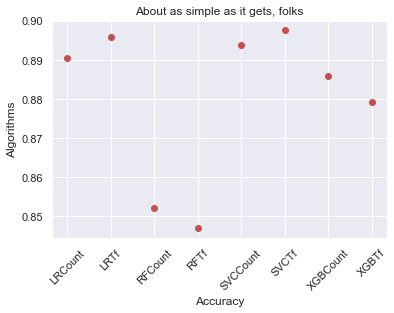

In [94]:
plt.plot(names,values,'ro')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
plt.title('About as simple as it gets, folks')
plt.xticks(rotation = 45, fontsize =11)
plt.show()

# Deep Learning

In [95]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_trainT = tokenizer.texts_to_sequences(X_train)
X_testT = tokenizer.texts_to_sequences(X_test)

In [96]:
vocab_size = len(tokenizer.word_index) + 1
#Kelime boyutuna +1. 
#Bu, önceden eğitilmiş kelime düğünlerinin bulunmadığı kelimelerin boyutlarını saklamak içindir.
maxlen = 100

X_trainT = pad_sequences(X_trainT, padding='post', maxlen=maxlen)
X_testT = pad_sequences(X_testT, padding='post', maxlen=maxlen)

In [97]:
from numpy import array
from numpy import asarray
from numpy import zeros
# GloVe yerleştirmelerindeki karşılık gelen değerleri içeren gömme matrisimizi oluştur
embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [98]:
#Bizim dosyamızdaki kelimelere karşılık gelen kelimeleri glove'dan almak
#word_tokenizer.word_index sözcüklerimizi ve bunlara karşılık gelen dizini içeren sözlüğü gezerek, 
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Burada gömme katmanında ilk parametre, boşlukların boyutudur. İkinci parametre, çıktı vektörünün vektör boyutudur. 100 boyutlu vektör içeren önceden eğitilmiş kelime düğünleri kullandığımız için vektör boyutunu 100 olarak ayarladık.

Weight önceden eğitilmiş gömme matrisinizi varsayılan ağırlıklar olarak weights parametreye iletilebilir.
Ve embedding layer eğitmediğimiz için, trainable false özellik olarak ayarlandı

In [99]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(units=32, return_sequences=True))
model.add(LSTM(units=16, return_sequences=True))
model.add(LSTM(units=4, return_sequences=True))
model.add(Dense(1, activation='sigmoid'))


In [100]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [101]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1293900   
_________________________________________________________________
lstm (LSTM)                  (None, 100, 32)           17024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 16)           3136      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 4)            336       
_________________________________________________________________
dense (Dense)                (None, 100, 1)            5         
Total params: 1,314,401
Trainable params: 20,501
Non-trainable params: 1,293,900
_________________________________________________________________
None


In [102]:
history = model.fit(X_trainT, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_testT, y_test, verbose=0)

Epoch 1/10
99/99 [==============================] - 22s 227ms/step - loss: 0.5011 - acc: 0.8177 - val_loss: 0.4831 - val_acc: 0.8140
Epoch 2/10
99/99 [==============================] - 18s 177ms/step - loss: 0.4753 - acc: 0.8180 - val_loss: 0.4739 - val_acc: 0.8140
Epoch 3/10
99/99 [==============================] - 17s 174ms/step - loss: 0.4640 - acc: 0.8180 - val_loss: 0.4924 - val_acc: 0.8140
Epoch 4/10
99/99 [==============================] - 18s 179ms/step - loss: 0.4650 - acc: 0.8181 - val_loss: 0.4806 - val_acc: 0.8141
Epoch 5/10
99/99 [==============================] - 17s 169ms/step - loss: 0.4693 - acc: 0.8182 - val_loss: 0.4498 - val_acc: 0.8143
Epoch 6/10
99/99 [==============================] - 18s 180ms/step - loss: 0.4666 - acc: 0.8184 - val_loss: 0.4772 - val_acc: 0.8150
Epoch 7/10
99/99 [==============================] - 20s 198ms/step - loss: 0.4537 - acc: 0.8179 - val_loss: 0.4488 - val_acc: 0.8140
Epoch 8/10
99/99 [==============================] - 17s 168ms/step - 

In [103]:
print("Test Accuracy:", score[1])

Test Accuracy: 0.8220188021659851


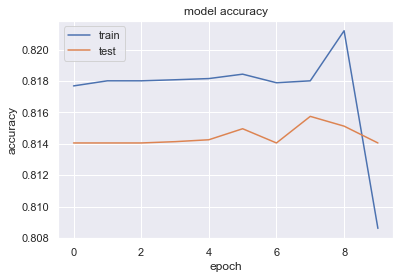

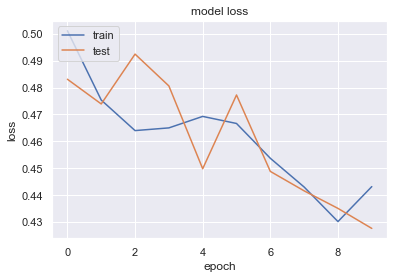

In [104]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Down sampling

In [105]:
X_trainS, X_testS, y_trainS, y_testS=train_test_split(df['ReviewText1'],df['RecommendedIND'].values,test_size=0.2,random_state=0,shuffle=True)

In [138]:
from sklearn.utils import resample
not_recomended = df[df.RecommendedIND == 0]
recomended = df[df.RecommendedIND == 1]

downsampled = resample(not_recomended,
                                         replace = True,
                                         n_samples = len(recomended),
                                         random_state = 111)

downsampled_df = pd.concat([recomended, downsampled])
downsampled_df.RecommendedIND.value_counts()

1    16087
0    16087
Name: RecommendedIND, dtype: int64

In [139]:
X_train,X_test,y_train,y_test = train_test_split(downsampled_df['ReviewText1'],downsampled_df['RecommendedIND'] ,random_state=42,test_size=0.2)

## Logistic Regression

In [141]:
classifier = LogisticRegression()
LRmodelC = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Train the Model
LRmodelC.fit(X_train,y_train)   
LRpred = LRmodelC.predict(X_testS)
print(f'Confusion Matrix:\n{confusion_matrix(y_testS,LRpred)}')
print(f'\nClassification Report:\n{classification_report(y_testS,LRpred)}')
print(f'Accuracy: {accuracy_score(y_testS,LRpred)*100}%')

Confusion Matrix:
[[ 667   36]
 [ 267 2963]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       703
           1       0.99      0.92      0.95      3230

    accuracy                           0.92      3933
   macro avg       0.85      0.93      0.88      3933
weighted avg       0.94      0.92      0.93      3933

Accuracy: 92.29595728451564%


In [109]:
LRCD = accuracy_score(y_testS,LRpred)

In [110]:
classifier = LogisticRegression()
LRmodelT = Pipeline([('vectorizer', tfvectorizer),
                 ('classifier', classifier)])

# Train the Model
LRmodelT.fit(X_train,y_train)   
LRpred = LRmodelT.predict(X_testS)
print(f'Confusion Matrix:\n{confusion_matrix(y_testS,LRpred)}')
print(f'\nClassification Report:\n{classification_report(y_testS,LRpred)}')
print(f'Accuracy: {accuracy_score(y_testS,LRpred)*100}%')

Confusion Matrix:
[[ 646   57]
 [ 373 2857]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.92      0.75       703
           1       0.98      0.88      0.93      3230

    accuracy                           0.89      3933
   macro avg       0.81      0.90      0.84      3933
weighted avg       0.92      0.89      0.90      3933

Accuracy: 89.06687007373506%


In [111]:
LRTD = accuracy_score(y_testS,LRpred)

## Random Forest

In [112]:
classifier = RandomForestClassifier()
RandomForestV = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Train the Model
RandomForestV.fit(X_train,y_train)   
rfpred = RandomForestV.predict(X_testS)
print(f'Confusion Matrix:\n{confusion_matrix(y_testS,rfpred)}')
print(f'\nClassification Report:\n{classification_report(y_testS,rfpred)}')
print(f'Accuracy: {accuracy_score(y_testS,rfpred)*100}%')

Confusion Matrix:
[[ 694    9]
 [  25 3205]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       703
           1       1.00      0.99      0.99      3230

    accuracy                           0.99      3933
   macro avg       0.98      0.99      0.99      3933
weighted avg       0.99      0.99      0.99      3933

Accuracy: 99.13551995931859%


In [113]:
RFCD = accuracy_score(y_testS,rfpred)

In [114]:
classifier = RandomForestClassifier()
RandomForestT = Pipeline([('vectorizer', tfvectorizer),
                 ('classifier', classifier)])

# Train the Model
RandomForestT.fit(X_train,y_train)   
rfpred = RandomForestT.predict(X_testS)
print(f'Confusion Matrix:\n{confusion_matrix(y_testS,rfpred)}')
print(f'\nClassification Report:\n{classification_report(y_testS,rfpred)}')
print(f'Accuracy: {accuracy_score(y_testS,rfpred)*100}%')

Confusion Matrix:
[[ 693   10]
 [  31 3199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       703
           1       1.00      0.99      0.99      3230

    accuracy                           0.99      3933
   macro avg       0.98      0.99      0.98      3933
weighted avg       0.99      0.99      0.99      3933

Accuracy: 98.95753877447241%


In [115]:
RFTD = accuracy_score(y_testS,rfpred)

## SVC

In [116]:
from sklearn.svm import SVC
classifier = SVC()
SvcV = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Train the Model
SvcV.fit(X_train,y_train)   
svcpred = SvcV.predict(X_testS)
print(f'Confusion Matrix:\n{confusion_matrix(y_testS,svcpred)}')
print(f'\nClassification Report:\n{classification_report(y_testS,svcpred)}')
print(f'Accuracy: {accuracy_score(y_testS,svcpred)*100}%')

Confusion Matrix:
[[ 684   19]
 [ 152 3078]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       703
           1       0.99      0.95      0.97      3230

    accuracy                           0.96      3933
   macro avg       0.91      0.96      0.93      3933
weighted avg       0.96      0.96      0.96      3933

Accuracy: 95.65217391304348%


In [117]:
SVCCD = accuracy_score(y_testS,svcpred)

In [118]:
classifier = SVC()
SvcT = Pipeline([('vectorizer', tfvectorizer),
                 ('classifier', classifier)])

# Train the Model
SvcT.fit(X_train,y_train)   
svcpred = SvcT.predict(X_testS)
print(f'Confusion Matrix:\n{confusion_matrix(y_testS,svcpred)}')
print(f'\nClassification Report:\n{classification_report(y_testS,svcpred)}')
print(f'Accuracy: {accuracy_score(y_testS,svcpred)*100}%')

Confusion Matrix:
[[ 694    9]
 [  91 3139]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       703
           1       1.00      0.97      0.98      3230

    accuracy                           0.97      3933
   macro avg       0.94      0.98      0.96      3933
weighted avg       0.98      0.97      0.98      3933

Accuracy: 97.45741164505468%


In [119]:
SVCTD = accuracy_score(y_testS,svcpred)

## XGBoost

In [120]:
classifier =xgb.XGBClassifier()
xgbC = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Train the Model
xgbC.fit(X_train,y_train)   
xgbpred = xgbC.predict(X_testS)
print(f'Confusion Matrix:\n{confusion_matrix(y_testS,xgbpred)}')
print(f'\nClassification Report:\n{classification_report(y_testS,xgbpred)}')
print(f'Accuracy: {accuracy_score(y_testS,xgbpred)*100}%')

Confusion Matrix:
[[ 663   40]
 [ 276 2954]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       703
           1       0.99      0.91      0.95      3230

    accuracy                           0.92      3933
   macro avg       0.85      0.93      0.88      3933
weighted avg       0.94      0.92      0.92      3933

Accuracy: 91.96542079837275%


In [121]:
XGBCD = accuracy_score(y_testS,xgbpred)

In [122]:
classifier =xgb.XGBClassifier()
xgbT = Pipeline([('vectorizer', tfvectorizer),
                 ('classifier', classifier)])

# Train the Model
xgbT.fit(X_train,y_train)   
xgbpred = xgbT.predict(X_testS)
print(f'Confusion Matrix:\n{confusion_matrix(y_testS,xgbpred)}')
print(f'\nClassification Report:\n{classification_report(y_testS,xgbpred)}')
print(f'Accuracy: {accuracy_score(y_testS,xgbpred)*100}%')

Confusion Matrix:
[[ 674   29]
 [ 241 2989]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       703
           1       0.99      0.93      0.96      3230

    accuracy                           0.93      3933
   macro avg       0.86      0.94      0.89      3933
weighted avg       0.95      0.93      0.93      3933

Accuracy: 93.13501144164759%


In [123]:
XGBTD = accuracy_score(y_testS,xgbpred)

In [124]:
names = ["LRCountD","LRTfD","RFCountD","RFTD","SVCCD","SVCtfD","XGBCD","XGBTD"]
values = [LRCD,LRTD,RFCD,RFTD,SVCCD,SVCTD,XGBCD,XGBTD]

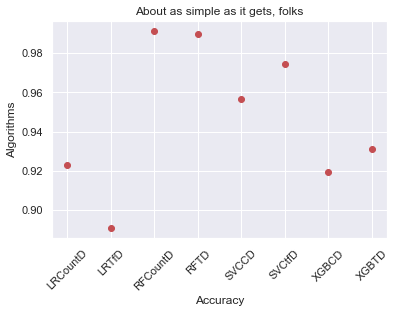

In [125]:
plt.plot(names,values,'ro')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
plt.title('About as simple as it gets, folks')
plt.xticks(rotation = 45, fontsize =11)
plt.show()